<a href="https://colab.research.google.com/github/jayantdahiya/Deep-Facial-Recognition/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [4]:
POS_PATH = os.path.join('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data', '/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/positive')
NEG_PATH = os.path.join('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data', '/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/negative')
ANC_PATH = os.path.join('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data', '/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/anchor')
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

In [5]:
# for directory in os.listdir('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/lfw'):
#   for file in os.listdir(os.path.join('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/lfw', directory)):
#     EX_PATH = os.path.join('/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/lfw', directory, file)
#     NEW_PATH = os.path.join(NEG_PATH, file)
#     os.replace(EX_PATH, NEW_PATH)

In [7]:
#Getting image directory
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)


In [8]:
dir_test = anchor.as_numpy_iterator()

In [9]:
print(dir_test.next())

b'/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/anchor/681d46fa-70da-11ec-882c-cae6cca50a85.jpg'


In [12]:
#function to decode image with values between 0 and 1
def preprocess(file_path):
  byte_img = tf.io.read_file(file_path)
  img = tf.io.decode_jpeg(byte_img)
  img = tf.image.resize(img, (100,100))
  img = img/255.0
  return img

In [16]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [17]:
data

<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>

In [19]:
sample = data.as_numpy_iterator()
example = sample.next()
example

(b'/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/anchor/6cbd78ba-70da-11ec-882c-cae6cca50a85.jpg',
 b'/content/drive/MyDrive/Colab/Deep-Facial-Recognition-Application/data/positive/cc9bcf48-70da-11ec-882c-cae6cca50a85.jpg',
 1.0)

In [18]:
def preprocess_twin(input_img, validation_img, label):
  return(preprocess(input_img), preprocess(validation_img), label)

In [20]:
res = preprocess_twin(*example)

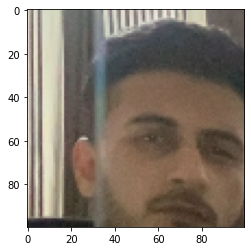

In [21]:
plt.imshow(res[1])

In [22]:
#Data pipeline 
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size = 1024)

In [23]:
samples=data.as_numpy_iterator()

In [32]:
samp1 = samples.next()

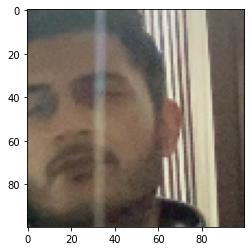

In [35]:
plt.imshow(samp1[0])

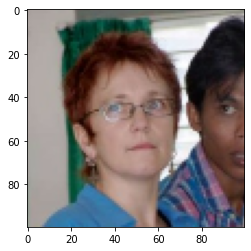

In [36]:
plt.imshow(samp1[1])

In [37]:
samp1[2]

0.0

In [38]:
#Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [39]:
train_samples = train_data.as_numpy_iterator()

In [40]:
train_sample = train_samples.next()

In [41]:
len(train_sample)

3

In [44]:
train_sample

(array([[[[0.3259804 , 0.38480392, 0.39656863],
          [0.33700982, 0.3887255 , 0.39950982],
          [0.36666667, 0.40588236, 0.4137255 ],
          ...,
          [0.3867647 , 0.36519608, 0.34754902],
          [0.39436275, 0.36691177, 0.34338236],
          [0.39093137, 0.3634804 , 0.33995098]],
 
         [[0.32107842, 0.38186276, 0.38284314],
          [0.32647058, 0.37916666, 0.38382354],
          [0.34289217, 0.3867647 , 0.39436275],
          ...,
          [0.40980393, 0.38235295, 0.35882354],
          [0.42230392, 0.39485294, 0.36985293],
          [0.39264706, 0.36519608, 0.33970588]],
 
         [[0.34338236, 0.39240196, 0.39338234],
          [0.32034314, 0.3752451 , 0.3762255 ],
          [0.33112746, 0.38382354, 0.3877451 ],
          ...,
          [0.42941177, 0.4019608 , 0.37254903],
          [0.4151961 , 0.3877451 , 0.35686275],
          [0.41960785, 0.39215687, 0.36078432]],
 
         ...,
 
         [[0.13186274, 0.175     , 0.15931372],
          [0.1375 

In [45]:
len(train_sample[0])

16

In [47]:
#testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)